
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to:


* Understand Bias and Variance    
* Know how does the degree of the polynomial affect the bias and variance

## Dataset

### Description

In this experiment we have chosen sine curve a real data.  As the real-world is never perfectly clean however, we add noise to the curve to show that the real world data is noisy. This is done by adding a small random number to each value. 


## AI /ML Technique

In this experiment, we use the sine curve to understand how the change in bias and variance effects the degree of polynomial.


### Bias and Variance:

The **bias** is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting). 

The **variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting). The below image shows how the overfitting and underfitting looks.

![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/Overfitting.png)




You can use any polynomial of higher order to project the idea of bias and variance. However, the sine values suits our experiment better because, it is a curve which is complex enough not to fit with simple linear or quadratic equations (to show bias) however it will overfit our data with higher order polynomials (6th order).

We want to try and capture the data using a polynomial function. A polynomial is defined by the degree, or the highest power for the x-values. A line has a degree of 1 because it is of the form $y = m_1*x + c$ where $m$ is the slope and $c$ is the intercept. A third degree polynomial would have the form $y = m_3 * x^3 + m_2 * x^2 + m_1* x + c$ and so on. The higher the degree of the polynomial, the more flexible the model.


We use fit_poly() to create a polynomial function with the specified number of degrees and plots the results. We can use these results to determine the optimal degrees to achieve the right balance between overfitting and underfitting. 


In this experiment we generate a  dataset to observe how the model changes with changing degrees.
  1. We will see how the model influences the performance. 
  2. Estimate the errors.

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="M1W4_CS_3_Effect_of_Regularisation" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


**Importing the required packages**

In [0]:
import numpy as np
import pandas as pd
# Scikit-Learn for fitting models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# For plotting 
import matplotlib
import matplotlib.pyplot as plt

**Generating the Data**

We define a curve, in this case a sine curve to serve as our process that generates the data. As the real-world is never perfectly clean however, we also need to add some noise into the observations. This is done by adding a small random number to each value.

In [0]:
#Set the random seed for reproducible results
np.random.seed(42)

#generating function representing a process in real life
def true_gen(x):
    y = np.sin(1.2 * x * np.pi) 
    return(y)

# x values and y value with a small amount of random noise
x = np.sort(np.random.rand(120))
y = true_gen(x) + 0.1 * np.random.randn(len(x))

**Training and Testing**

In [0]:
# Random indices for creating training and testing sets
random_ind = np.random.choice(list(range(120)), size = 120, replace=False)
x_t = x[random_ind]
y_t = y[random_ind]

# Training and testing observations
train = x_t[:int(0.7 * len(x))]
test = x_t[int(0.7 * len(x)):]

y_train = y_t[:int(0.7 * len(y))]
y_test = y_t[int(0.7 * len(y)):]

# Model the true curve
x_linspace = np.linspace(0, 1, 1000)
y_true = true_gen(x_linspace)

**Visualization**

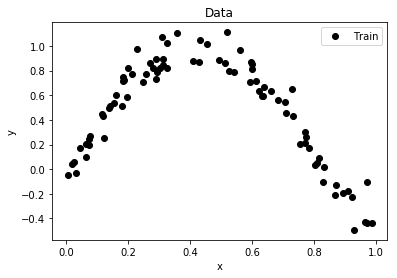

In [9]:
# Visualize observations and true curve
plt.plot(train, y_train, 'ko', label = 'Train'); 
#plt.plot(test, y_test, 'ro', label = 'Test')
#plt.plot(x_linspace, y_true, 'b-', linewidth = 2, label = 'True function')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.title('Data');
plt.savefig('just_data.png')

**Polynomial Model**

We want to try and capture the data using a polynomial function. A polynomial is defined by the degree, or the highest power for the x-values. A line has a degree of 1 because it is of the form $y = m_1*x + c$ where $m$ is the slope and $c$ is the intercept. A third degree polynomial would have the form $y = m_3 * x^3 + m_2 * x^2 + m_1* x + c$ and so on. The higher the degree of the polynomial, the more flexible the model.

The following function creates a polynomial with the specified number of degrees and plots the results. We can use these results to determine the optimal degrees to achieve the right balance between over and underfitting.

In [0]:
def fit_poly(train, y_train, test, y_test, degrees, plot='train', regularisation='L', return_scores=False):
    
    # Create a polynomial transformation of features
    features = PolynomialFeatures(degree=degrees, include_bias=False)
    
    # Reshape training features for use in scikit-learn and transform features
    train = train.reshape((-1, 1))
    train_trans = features.fit_transform(train)
    
    # Create the linear regression model and train
    if regularisation=='L':
      model = LinearRegression()
      model.fit(train_trans, y_train)
    
    elif regularisation=='L1':
      model = Lasso(alpha=0.00125, fit_intercept=True)
      model.fit(train_trans, y_train)
    
    elif regularisation=='L2':
      model = Ridge(alpha=0.00125, fit_intercept=True)
      model.fit(train_trans, y_train)
    
    # Train set predictions and error
    train_predictions = model.predict(train_trans)
    training_error = mean_squared_error(y_train, train_predictions) # Format test features
    test = test.reshape((-1, 1))
    test_trans = features.fit_transform(test)
    
    # Test set predictions and error
    test_predictions = model.predict(test_trans)
    testing_error = mean_squared_error(y_test, test_predictions)
    
    # Find the model curve and the true curve
    x_curve = np.linspace(0, 1, 100)
    x_curve = x_curve.reshape((-1, 1))
    x_curve_trans = features.fit_transform(x_curve)
    
    # Model curve
    model_curve = model.predict(x_curve_trans)
    
    # True curve
    y_true_curve = true_gen(x_curve[:, 0])
    
    # Plot observations, true function, and model predicted function
    if plot == 'train':
        plt.plot(train[:, 0], y_train, 'ko', label = 'Observations')
        plt.plot(x_curve[:, 0], y_true_curve, linewidth = 4, label = 'True Function')
        plt.plot(x_curve[:, 0], model_curve, linewidth = 4, label = 'Model Function')
        plt.xlabel('x'); plt.ylabel('y')
        plt.legend()
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.title('{} Degree Model on Training Data'.format(degrees))
        plt.savefig('{}_regularisation_{}_degrees.png'.format(regularisation, str(degrees)))
        plt.show()
        
    elif plot == 'test':
        # Plot the test observations and test predictions
        plt.plot(test, y_test, 'o', label = 'Test Observations')
        plt.plot(x_curve[:, 0], y_true_curve, 'b-', linewidth = 2, label = 'True Function')
        plt.plot(test, test_predictions, 'ro', label = 'Test Predictions')
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.legend(), plt.xlabel('x'), plt.ylabel('y'); plt.title('{} Degree Model on Testing Data'.format(degrees)), plt.show();
    
     # Return the metrics
    if return_scores:
        return training_error, testing_error


**Model with Different Degrees** 

Degrees = 1 -> Underfitting

For example, a degree-1 polynomial fits a straight line to the data. In this case a linear model cannot accurately learn the relationship between x and y so it will underfit the data. This is because an underfit model has low variance and high bias. Variance refers to how much the model is dependent on the training data.

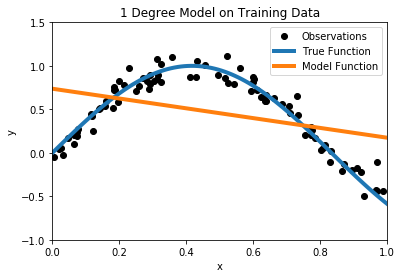

In [11]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='train')

**Degrees = 25 -> Overfitting**
 An overfit model will have extremely low training error but a high testing error.

We can go in the completely opposite direction and create a model that overfits the data. This model has too much flexibility and learns the training data too closely. As the training data has some amount of noise, it will end up capturing that noise and will be misled by that noise when it tries to make predictions on the test data.

This is a model with a high variance, because it will change significantly depending on the training data.

### Fitting the polynomial features without any regularisation

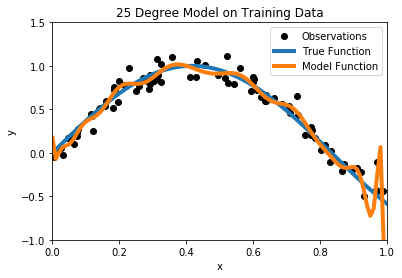

In [13]:
fit_poly(train, y_train, test, y_test, degrees = 25, regularisation='L', plot='train')

### Fitting the polynomial features with L1 regularisation

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


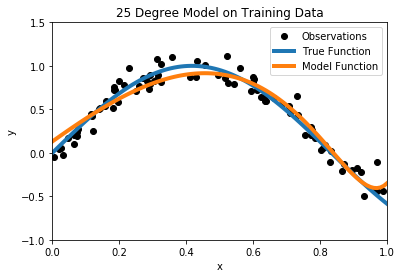

In [14]:
fit_poly(train, y_train, test, y_test, degrees = 25, regularisation='L1', plot='train')

### Fitting the polynomial features with L2 regularisation

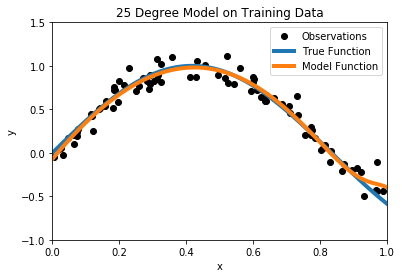

In [15]:
fit_poly(train, y_train, test, y_test, degrees = 25, regularisation='L2', plot='train')

### Please answer the questions below to complete the experiment:




In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test'\"" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [19]:
#@title Run this cell to submit your notebook{ vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4288
Date of submission:  27 Apr 2019
Time of submission:  22:03:59
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
